# Ford GoBike Data Visualiztaion 
## by Bassant Hany

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area for the month February, 2019

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



%matplotlib inline

### Importing the data 

In [3]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check for missing values
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Here we can see that there's 197 trips with no info about the start or end station, also 8265 members have no year or gender assigned we need to clean that

In [6]:
#copy the dataframe into a new one to begin our cleaning
bike_data_clean = bike_data.copy()
#drop Rows with NaN values
bike_date_clean = bike_data_clean.dropna(axis = 0, inplace = True)
#check if dataframe doesn't have any NaN values
bike_data_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [7]:
# check for duplicated rows
bike_data_clean.duplicated().sum()

0

In [8]:
#summary statistics
pd.set_option('float_format', '{:f}'.format)
bike_data_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Now we drop unwanted columns

In [9]:
#drop unwanted columns 
bike_data_clean.drop(['bike_share_for_all_trip','start_station_id', 'end_station_id',
              'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude'], axis=1, inplace=True)
#check it they are dropped
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        174952 non-null  int64  
 1   start_time          174952 non-null  object 
 2   end_time            174952 non-null  object 
 3   start_station_name  174952 non-null  object 
 4   end_station_name    174952 non-null  object 
 5   bike_id             174952 non-null  int64  
 6   user_type           174952 non-null  object 
 7   member_birth_year   174952 non-null  float64
 8   member_gender       174952 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 13.3+ MB


### we see that both start_time and end_time colmns need their type to be changed into apropriate date type, member_gender and user_type to categorical,bike_id to str and member_birth_year to int

In [10]:
# to object/string
bike_data_clean.bike_id = bike_data_clean.bike_id.astype('str')

#to int 
bike_data_clean.member_birth_year = bike_data_clean.member_birth_year.astype('int')

# to category
bike_data_clean.user_type = bike_data_clean.user_type.astype('category')
bike_data_clean.member_gender = bike_data_clean.member_gender.astype('category')

# to datetime
bike_data_clean.start_time = pd.to_datetime(bike_data_clean.start_time)
bike_data_clean.end_time = pd.to_datetime(bike_data_clean.end_time)

#check if they were changed 
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  object        
 6   user_type           174952 non-null  category      
 7   member_birth_year   174952 non-null  int32         
 8   member_gender       174952 non-null  category      
dtypes: category(2), datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 10.3+ MB


### add column for the day of the week extracting it from the start_time column, column for trip duration in minutes, columns for start hour and end hour, also add a column for the users age

In [11]:
#extract day of the week in which every trip took place from start_time and add it in a new column
bike_data_clean['day_of_week'] = bike_data_clean['start_time'].dt.day_name()
bike_data_clean.day_of_week = bike_data_clean.day_of_week.astype('category')

#extract start hour and hour and create new columns for it
bike_data_clean['start_hour'] = bike_data_clean['start_time'].dt.hour
bike_data_clean['end_hour'] = bike_data_clean['end_time'].dt.hour

#divide trip duration by 60 and add it in new column 
bike_data_clean['duration_minutes'] = bike_data_clean['duration_sec']/60

#Create column for users age in 2019
bike_data_clean['member_age'] = 2019-bike_data_clean['member_birth_year'].astype('int')

#check if it's added 
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  object        
 6   user_type           174952 non-null  category      
 7   member_birth_year   174952 non-null  int32         
 8   member_gender       174952 non-null  category      
 9   day_of_week         174952 non-null  category      
 10  start_hour          174952 non-null  int64         
 11  end_hour            174952 non-null  int64         
 12  duration_minutes    174952 non-null  float64       
 13  member_age          174952 no

### What is the structure of your dataset?

> The data after cleaning consists of 13 columns, 174952 rows. It contains info like duration of trip, start station name, end station name, bike id, user type, birth year and gender

### What is/are the main feature(s) of interest in your dataset?

> User type & Start time 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the rest of features as i dropped unwanted columns and added columns of my own to help inestigating the data more

## Univariate Exploration

### firstly, let's see the percentage of user types

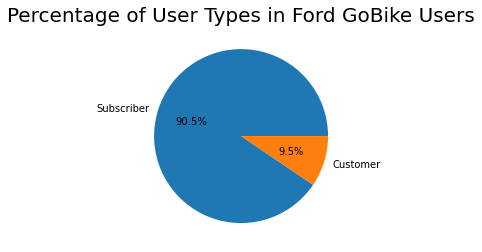

In [12]:
#sort the users types
sorted_user_types = bike_data_clean['user_type'].value_counts()
#create a pie chart and format it
plt.pie(sorted_user_types, labels = sorted_user_types.index, autopct='%1.1f%%', startangle=0, counterclock = True)
plt.title("Percentage of User Types in Ford GoBike Users", fontsize=20, y=1.0);

### we can conclude that the majority of users are subscribers!

### secondly, let's check the top 10 most popular start and end stations

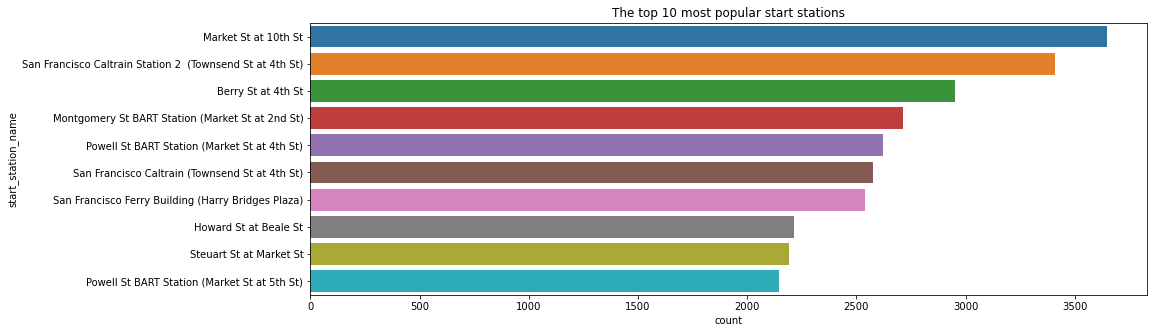

In [13]:
# plot a horizontal bar chart and format it
start_order = bike_data_clean['start_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,5])
plt.title('The top 10 most popular start stations')
sb.countplot(data = bike_data_clean, y = 'start_station_name', order = start_order);

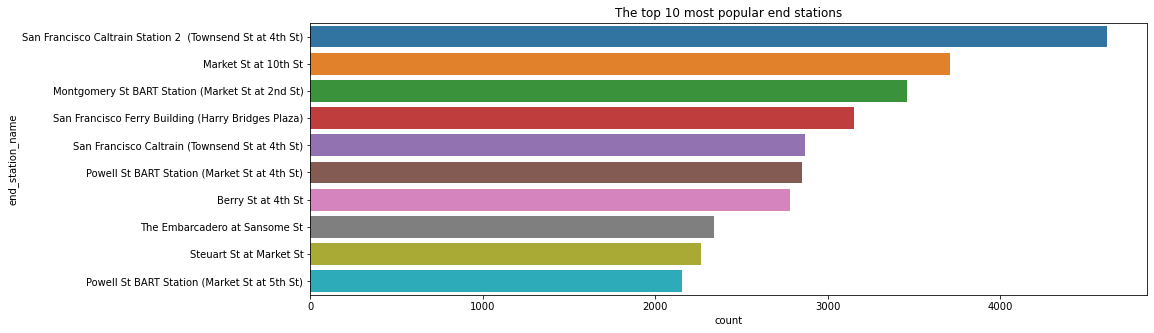

In [14]:
# plot a horizontal bar chart and format it
end_order = bike_data_clean['end_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,5])
plt.title('The top 10 most popular end stations')
sb.countplot(data = bike_data_clean, y = 'end_station_name', order = end_order);

### it seems like 'Market St at 10th St' and 'San francisco caltrain station 2' are the most popular stations at both starting and ending trips!

### let's see the distribution of rides start_hour over the 24hrs of the days 

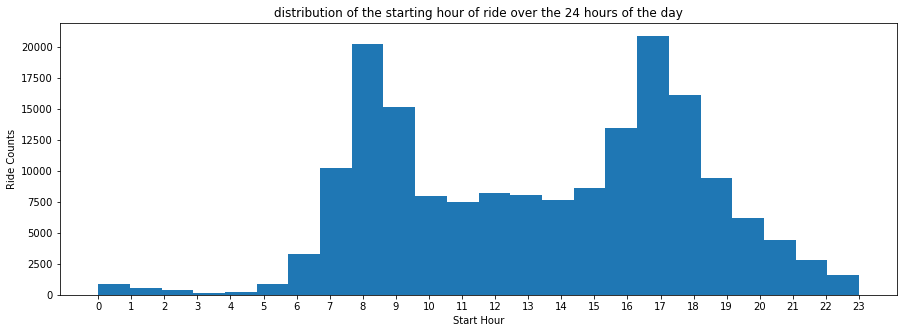

In [15]:
# plot a histogram 
plt.figure(figsize=[15,5])
#chose 24 bins for 24 hours of the day
plt.hist(data = bike_data_clean, x = 'start_hour', bins = 24)
#start the ticks from zero to 24 incrementing by 1
plt.xticks(np.arange(0, 24, 1))
plt.title('distribution of the starting hour of ride over the 24 hours of the day')
#create labels for x and y axis
plt.ylabel('Ride Counts')
plt.xlabel('Start Hour');

### The most popular hours were 8:00 AM and 5:00 PM, which are one hour before work starts and the hour work ends, we can conclude that people tend to rent bikes right before going to work or right after finishing work

### see the distribution of users age , first check the min and max values for age

In [16]:
#check the min and the max values of member age
bike_data_clean.member_age.describe()

count   174952.000000
mean        34.196865
std         10.118731
min         18.000000
25%         27.000000
50%         32.000000
75%         39.000000
max        141.000000
Name: member_age, dtype: float64

### we can see that there's a user with the age 141 which can not be true let's delete this record and all records over 100 and check again

In [17]:
#drop rows with member age less than 100
bike_data_clean = bike_data_clean[bike_data_clean['member_age']< 100 ]
#check the range
bike_data_clean.member_age.describe()

count   174880.000000
mean        34.162043
std          9.974001
min         18.000000
25%         27.000000
50%         32.000000
75%         39.000000
max         99.000000
Name: member_age, dtype: float64

### now we have a somehow reasonable range of ages let's plot them on a histogram

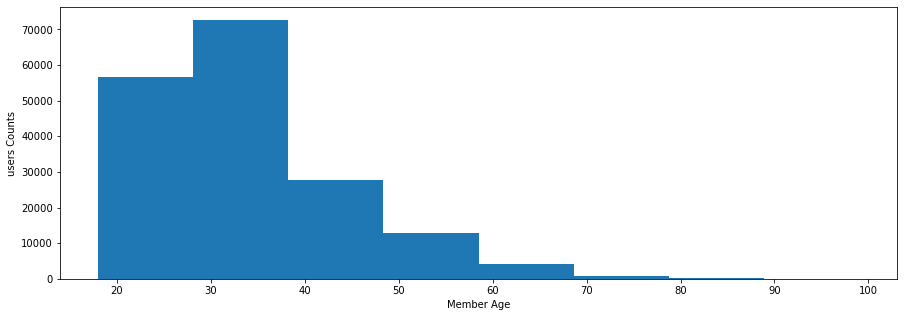

In [18]:
# plot a histogram and format it
plt.figure(figsize=[15,5])
#choose 8 bins as there are about eight generations in users aged from 18 to 99
plt.hist(data = bike_data_clean, x = 'member_age', bins = 8)
#create labels for the axis
plt.ylabel('users Counts')
plt.xlabel('Member Age');

### we can see that most users are aged between 30 - 40 years old  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes for the user_type i found that the majority of users (91%) are subscribers, and the most popular starting hours were 8:00 AM and 5:00 PM which as i mentioned are right before and after the work day! Also found the same two stations are the most popular in both starting and ending stations, and found that most users are in their thirties

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes i've added several columns as i extracted both the hour and day from start_time, and added a column that has the duration in minutes to facilitate my analysis and changed a couple of columns types to the apropriate data type and added a column for members age

## Bivariate Exploration

### let's plot the trip duration against each day of the week to see if there's any day with significantly longer trips 

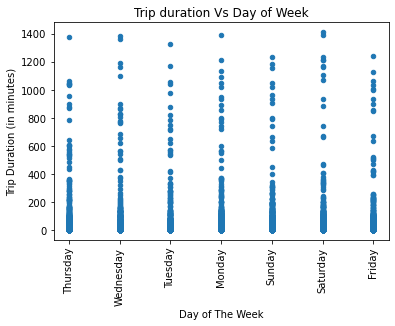

In [19]:
#create a scatter plot and format it
plt.scatter (bike_data_clean.day_of_week, bike_data_clean.duration_minutes, s=20);
#create a title 
plt.title('Trip duration Vs Day of Week')
#create a label for x axis and rotate it 90 degrees for easier read
plt.xlabel('Day of The Week')
plt.xticks(rotation = 90 )
#create a label for y axis
plt.ylabel('Trip Duration (in minutes)');

### it seems like there's no difference except for friday is slightly lower than the rest of week

### Now Let's see the weekly usage of both subscribers and customers 

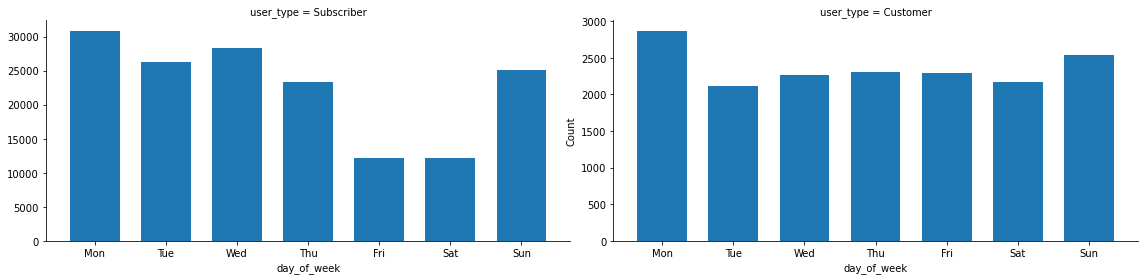

In [20]:
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorted_types = bike_data_clean['user_type'].value_counts().index
#creating histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = bike_data_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = sorted_types, sharey=False)
g.map(plt.hist, 'day_of_week', bins = bin_edges, rwidth = 0.7);
plt.ylabel('Count')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);

### we can notice that Monday is the highest in usage for both customers and subscribers. Also customers have nearly constant usage through the week meanwhile subscribers have lower usage in Friday and Saturday

### Now let's repeat but this time plot user types against Start_hour

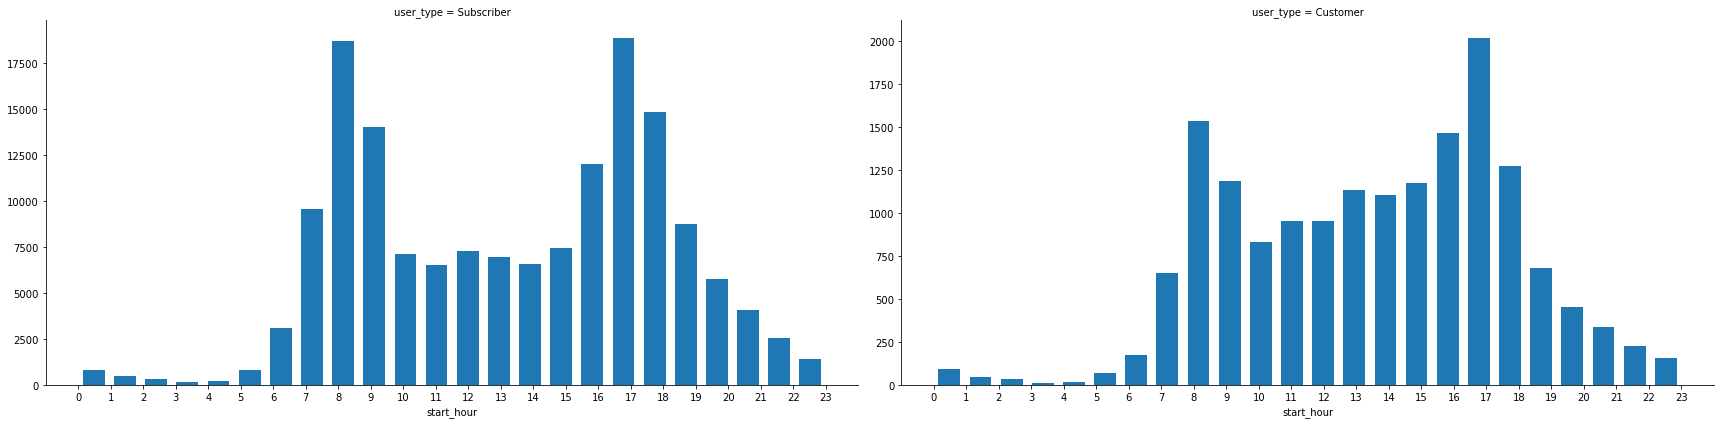

In [21]:
g = sb.FacetGrid(data = bike_data_clean, col = 'user_type', height=6, aspect=2, 
                 col_order = sorted_types, sharey=False)
g.map(plt.hist, 'start_hour', bins = 24, rwidth = 0.7);
plt.xticks(np.arange(0, 24, 1));

### they both have similar distribution with the highest hour being 5:00 PM but customers tend to use their bikes more during rush hours

### Now let's see if there's a correlation between User age and trip duration

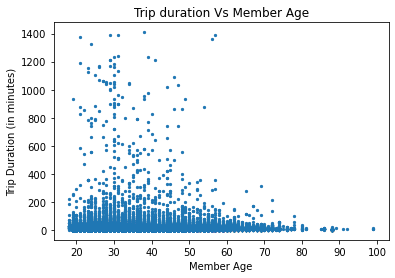

In [22]:
#create a scatter plot and format it
plt.scatter (bike_data_clean.member_age, bike_data_clean.duration_minutes, s=5);
#create a title 
plt.title('Trip duration Vs Member Age')
#create a label for x axis 
plt.xlabel('Member Age')
#create a label for y axis
plt.ylabel('Trip Duration (in minutes)');

### we can see that most users have the same trip duration which is about 120 - 200 mins, also we can notice that almost all of the higher values comes from people under the age of 60 which makes sense given that elderly people have lower stamina even if they're athelitic 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most rides started at 8 or 17. Almost All of the rides that lasted more than 120 mins were done by members under the age of 50. Friday has the least trip durations in all week. During Weekends customers make more trips than subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> NO i did not.

## Multivariate Exploration


### let's create a plot to see when does each gender prefer to start their ride, for both customers and subscribers

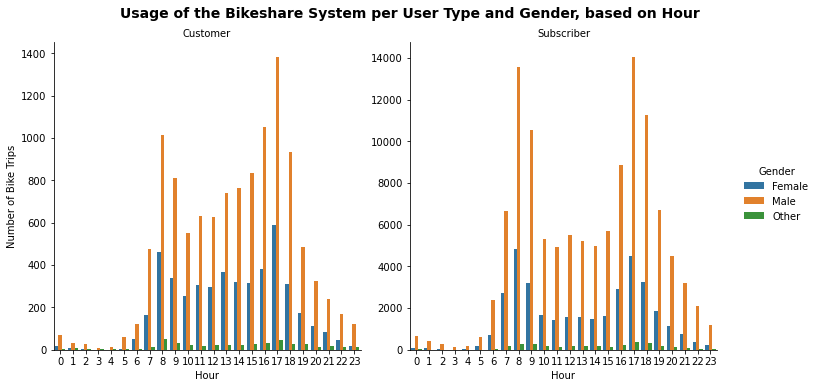

In [23]:
#create a range of 24 to plot 24 hrs of the day
orderz = np.arange(0, 24, 1)
#create the plot and format it
g = sb.catplot(data=bike_data_clean, x='start_hour', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = orderz)
g.set_axis_labels("Hour", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, based on Hour', y=1.03, fontsize=14, fontweight='semibold');

### it's clear that males have much higher usage among genders, specifically around 8:00 AM and 5:00 PM

### here let's create a plot to see which hours were the most common to end your trip during the week for both subscribers and customers

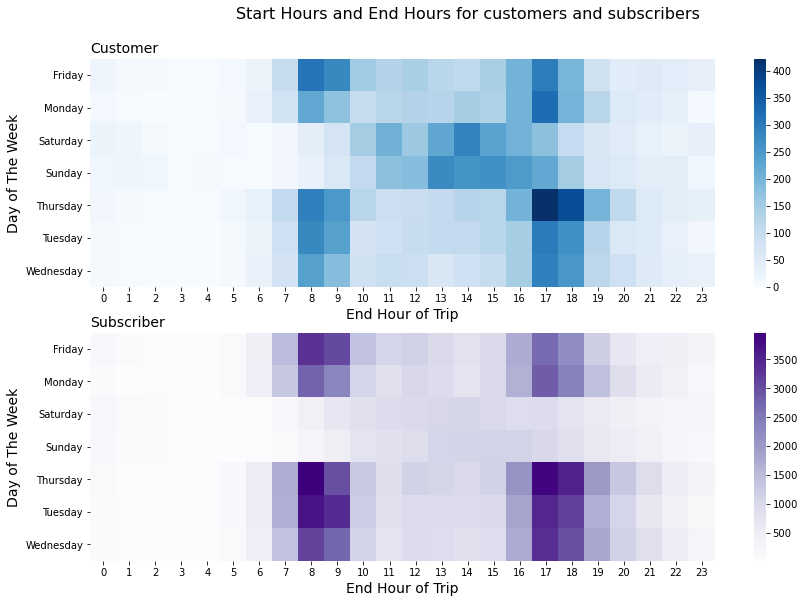

In [24]:
plt.figure(figsize=(14,9))
#create heatmap and format it
plt.subplot(2, 1, 1)
customers = bike_data_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['day_of_week', 'end_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='day_of_week', columns='end_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='left', fontsize=14);
plt.xlabel('End Hour of Trip', fontsize=14);
plt.ylabel('Day of The Week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = bike_data_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['day_of_week', 'end_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='day_of_week', columns='end_hour', values='count')
sb.heatmap(st_counts, cmap="Purples");
plt.title('Subscriber', loc='left', fontsize=14);
plt.xlabel('End Hour of Trip', fontsize=14);
plt.ylabel('Day of The Week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Start Hours and End Hours for customers and subscribers', fontsize=16);


### from here we can deduce that customers tend to use bikes during the weekend mean while subscribes don't. Also the end_hour most common values being the same as start_hour tells that most of the trips don't last for more than an hour

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The last two graphs cemented some insights like the busiest hours being 8:00 am and 5:00 pm, Customers tend to use bikes more during weekends. 

### Were there any interesting or surprising interactions between features?

> yes i didn't expected the difference between males and females users number to be this large, male users are almost twice the female users